Username: lala
Matric number: 1010
Welcome, Lala!
Which enhancement technique do you want to view the picture in: 
1: Seperate
2: Additon 
3: Contrast 
4: Sharpen 
5: Noise removal
6: Scale Image
7: Invert image
5


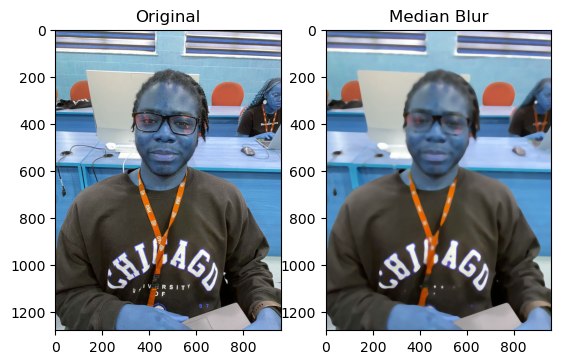

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def get_username_and_mat_no():
    username = input("Username: ").strip().lower()
    mat_no = int(input("Matric number: ").strip().lower())
    return username, mat_no

def load_user_mat_no_map():
    
    firstname1 = "lala"
    firstname2 = "zion"
    firstname3 = "kobi"
    firstname4 = "eze"
    firstname5 = "alo"
    firstname6 = "bruno"
    firstname7 = "oyinda"
    firstname8 = "david"
    firstname9 = "francis"
    firstname10 = "lotanna"
    
    
    mat_no1 =  1010
    mat_no2 =  1011
    mat_no3 =  1012
    mat_no4 =  1013
    mat_no5 = 1014
    mat_no6 = 1015
    mat_no7 =  1016
    mat_no8 = 1017
    mat_no9 =  1018
    mat_no10 = 1019
    
    
    return {
        firstname1: mat_no1,
        firstname2: mat_no2,
        firstname3: mat_no3,
        firstname4: mat_no4,
        firstname5: mat_no5,
        firstname6: mat_no6,
        firstname7: mat_no7,
        firstname8: mat_no8,
        firstname9: mat_no9,
        firstname10: mat_no10,
    }

def get_real_mat_no(username, user_mat_no_map):
    return user_mat_no_map.get(username)

def load_and_display_image(username):
    path = f"img/{username}.jpeg"
    img = cv2.imread(path)
    return img

def show_image(img):
    window_name = "Display Image"
    cv2.imshow(window_name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


        
def separate(username):
    image = cv2.imread(f"img/{username}.jpeg")

    B,G,R = cv2.split(image)

    cv2.imshow("original", image)
    cv2.waitKey(0)

    cv2.imshow("Blue", B)
    cv2.waitKey(0)

    cv2.imshow("Green", G)
    cv2.waitKey(0)

    cv2.imshow("Red", R)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
                       
def addition(username):
    image1 = cv2.imread(f"img/{username}.jpeg")
    image2 = cv2.imread("img/peter.jpg")

    image1= cv2.resize(image1, (500,400))
    image2= cv2.resize(image2, (500,400))

    addImage = cv2.addWeighted(image1, 0.5,image2,0.6,0)
    sub = cv2.subtract(image1,image2)

    cv2.imshow('Weighted Image', addImage)
    cv2.imshow('Weighted Image --Subtract', sub)

    if cv2.waitKey(0) & 0xff ==27:
        cv2.destroyAllWindows()
                       
def contrast(username):
    image = cv2.imread(f"img/{username}.jpeg")

    plt.subplot(1,2,1)
    plt.title("Original")
    plt.imshow(image)

    brightness = 5
    contrast = 1.5
    image2 = cv2.addWeighted(image, contrast, np.zeros(image.shape, image.dtype), 0, brightness)

    cv2.imwrite("img/contrast_image1.jpg", image2)

    plt.subplot(1,2,2)
    plt.title("Brightness & Contrast")
    plt.imshow(image2)
    plt.show()
    
def sharpen(username):
    image = cv2.imread(f"img/{username}.jpeg")

    plt.subplot(1,2,1)
    plt.title("Original")
    plt.imshow(image)

    kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
    sharpened_image = cv2.filter2D(image, -1, kernel)

    cv2.imwrite("img/sharpened_image1.jpg", sharpened_image )

    plt.subplot(1,2,2)
    plt.title("Sharpening")
    plt.imshow(sharpened_image)
    plt.show()
    
def noise_removal(username):
    image = cv2.imread(f"img/{username}.jpeg")

    plt.subplot(1,2,1)
    plt.title("Original")
    plt.imshow(image)

    filtered_image = cv2.medianBlur(image, 15)

    cv2.imwrite("img/Median-Blur1.jpg", filtered_image )

    plt.subplot(1,2,2)
    plt.title("Median Blur")
    plt.imshow(filtered_image)
    plt.show()

def scale_image(username):

    image = cv2.imread(f"img/{username}.jpeg")

    plt.subplot(1,2,1)
    plt.title("Original")
    plt.imshow(image)

    scaled_image = cv2.resize(image, None, fx=2, fy=2)

    cv2.imwrite("img/Scaled1.jpg", scaled_image )

    plt.subplot(1,2,2)
    plt.title("Scale")
    plt.imshow(scaled_image)
    plt.show()

def inverse(username):
    image = cv2.imread(f"img/{username}.jpeg")

    plt.subplot(1,2,1)
    plt.title("Original")
    plt.imshow(image)

    inverse_image = 255 - image


    cv2.imwrite("img/inverse_image.jpg", inverse_image )
    plt.subplot(1,2,2)
    plt.title("inverse color")
    plt.imshow(inverse_image)
    plt.show()
    
def facial_recognition_login():
    username, mat_no = get_username_and_mat_no()
    user_mat_no_map = load_user_mat_no_map()
    real_mat_no = get_real_mat_no(username, user_mat_no_map)
    
    if real_mat_no is not None:
        img = load_and_display_image(username)
        if mat_no == real_mat_no:
            print(f"Welcome, {username.capitalize()}!")
        else:
            print("Incorrect Matric number.")
        if img is not None and mat_no == real_mat_no:
            
            print("Which enhancement technique do you want to view the picture in: ")
            print("1: Seperate")
            print("2: Additon ")
            print("3: Contrast ")
            print("4: Sharpen ")
            print("5: Noise removal")
            print("6: Scale Image")
            print("7: Invert image")
            
            option = input("").strip().lower()
            
            match option:
                case "1":
                    separate(username)
                case "2":
                    addition(username)
                case "3":
                    contrast(username)
                case "4":
                    sharpen(username)
                case "5":
                    noise_removal(username)
                case "6":
                    scale_image(username)
                case "7":
                    inverse(username)
                                    
        else:
            print("invalid option")

        
    else:
        print("Invalid username.")

facial_recognition_login()
